In [19]:
# random forest classifier for car classfication
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

# load data
input_file = 'car.data.txt'
X = []
count = 0

with open(input_file,'r') as f:
    for line in f.readlines():
        data = line[:-1].split(',')
        X.append(data)

X = np.array(X)


# label encoding : convert string to numerical
'''
# X[:,i]表示每一行的第i列值，组成的列表
for i in range(len(X[0])):
    print(i,' -> ',X[:,i],len(X[:,i]))
    
# X.shape = (rows,columns)
print(type(X.shape))

# np.empty 根据指定的行列，生成新的数组
print(np.empty(X.shape))
'''

label_encoder = []
X_encoded = np.empty(X.shape)
for i,item in enumerate(X[0]):
    label_encoder.append(preprocessing.LabelEncoder())
    # print(i,label_encoder[-1].fit_transform(X[:,i]))
    X_encoded[:,i] = label_encoder[-1].fit_transform(X[:,i])
    
X = X_encoded[:,:-1].astype(int)
Y = X_encoded[:,-1].astype(int)

# Build a Random Forest Classifier
params = {'n_estimators': 200, 'max_depth': 8, 'random_state': 7}
classifier = RandomForestClassifier(**params)
classifier.fit(X,Y)

# validation
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(classifier,X,Y,scoring='accuracy', cv=2)
print('\nAccuracy ',round(100*accuracy.mean(),2),"%")


C:\Users\jichao1.wang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"



Accuracy  72.45 %


In [25]:
'''
from sklearn import preprocessing as skpp
label_encoder = skpp.LabelEncoder() # it knows how to understand word labels,去重并排序

# create labels
input_classes = ['audi','ford','audi','toyota','ford','bmw']

# encode labels 1
label_encoder.fit(input_classes)
print("\nClass mapping:\n")
for i,item in enumerate(label_encoder.classes_):
    print(item,'-->',i)
    

# encode labels 2
print("\nencode labels : ",list(label_encoder.transform(input_classes)))

# decode numeric labels back to words
encoded_labels = [2,1,0,3,1]
print("\ndecode labels : ",list(label_encoder.inverse_transform(encoded_labels)))
'''

'''
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(input_data)
for i,item in enumerate(input_data):
    print(i, list(label_encoder.transform(input_data))[i])
print(input_data_encoded)
'''

count = 0
input_data = ['vhigh', 'vhigh', '2', '2', 'small', 'low']
input_data_encoded = [-1] * len(input_data)

for i,item in enumerate(input_data):
    if item.isdigit():
        input_data_encoded[i] = int(input_data[i])
    else:
        input_data_encoded[i] = int(label_encoder[count].transform([input_data[i]]))
        count += 1

print(type(input_data_encoded))
input_data_encoded = np.array(input_data_encoded)

print(type(input_data_encoded))
print(input_data_encoded)


ValueError: y contains previously unseen labels: ['small']

In [16]:
input_data = ['vhigh', 'vhigh', '2', '2', 'small', 'low']
label=preprocessing.LabelEncoder()
label.fit(input_data)
print("data mapping:")
for i,item in enumerate(label.classes_):
    print(item, '->' ,i)

label_encoder = []
label_encoded = []
for i ,item in enumerate(input_data):
    label_encoder.append(preprocessing.LabelEncoder())
    input_data_encoded[i] = list(label_encoder[-1].fit_transform(input_data))[i]

print(input_data_encoded)
input_data_encoded = np.array(input_data_encoded).reshape(1,-1)
output_class = classifier.predict(input_data_encoded)
print(output_class)
print("output class :",label_encoder[-1].inverse_transform(output_class)[0])

data mapping:
2 -> 0
low -> 1
small -> 2
vhigh -> 3
[3, 3, 0, 0, 2, 1]
[2]
output class : small


In [97]:
# validation curve : operational hyperparameters
from sklearn.model_selection import validation_curve

classifier = RandomForestClassifier(max_depth=4, random_state=7)
parameter_grid = np.linspace(25, 200, 8).astype(int)
train_scores, validation_scores = validation_curve(classifier, X, Y, 'n_estimators', parameter_grid, cv=5)
print("\nValidation Curve")
print("\nParam: n_estimators\nTraining scores:\n",train_scores)
print("\nParam: n_estimators\nValidation scores:\n",validation_scores)

# plot the curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis=1), color='black')
plt.title("Traning Curve")
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()

C:\Users\jichao1.wang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=n_estimators, param_range=[ 25  50  75 100 125 150 175 200] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\jichao1.wang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"



 Validation Curve

 Param: n_estimators
Training scores:
 [[0.80680174 0.80824891 0.80752533 0.80694143 0.81127983]
 [0.79522431 0.80535456 0.81114327 0.81055676 0.81344902]
 [0.80101302 0.80680174 0.81041968 0.81344902 0.81923355]
 [0.8024602  0.80680174 0.81186686 0.80911063 0.8076645 ]
 [0.80028944 0.80463097 0.81186686 0.80911063 0.81561822]
 [0.80390738 0.80535456 0.81041968 0.80911063 0.81851048]
 [0.80390738 0.80463097 0.81186686 0.81489516 0.81706435]
 [0.80390738 0.80680174 0.81186686 0.81344902 0.81706435]]

 Param: n_estimators
Validation scores:
 [[0.71098266 0.76589595 0.71965318 0.77101449 0.73913043]
 [0.71098266 0.75433526 0.71965318 0.75942029 0.75652174]
 [0.71098266 0.72543353 0.71965318 0.75942029 0.74492754]
 [0.71098266 0.71098266 0.71676301 0.75942029 0.72753623]
 [0.71098266 0.74566474 0.71965318 0.75942029 0.74202899]
 [0.71098266 0.74277457 0.71676301 0.75942029 0.75362319]
 [0.71098266 0.74566474 0.71965318 0.75942029 0.74492754]
 [0.71098266 0.74855491 0.71

C:\Users\jichao1.wang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=max_depth, param_range=[ 2  4  6  8 10] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\jichao1.wang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"



Validation Curve

Param: max_depth
Training scores:
 [[0.71852388 0.70043415 0.70043415 0.69992769 0.69992769]
 [0.80607815 0.80535456 0.81041968 0.8033261  0.80694143]
 [0.90520984 0.90955137 0.92329957 0.90166305 0.90744758]
 [0.97467438 0.96599132 0.97322721 0.97107737 0.96963124]
 [0.99493488 0.99493488 0.99782923 0.99855387 0.99204628]]

Param: max_depth
Validation scores:
 [[0.69942197 0.69942197 0.69942197 0.70144928 0.70144928]
 [0.71098266 0.76589595 0.71965318 0.75942029 0.72753623]
 [0.71387283 0.76300578 0.76011561 0.8173913  0.83188406]
 [0.67919075 0.76589595 0.78901734 0.77971014 0.89855072]
 [0.64450867 0.79768786 0.78034682 0.8173913  0.87246377]]


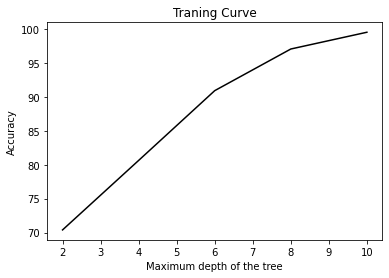

In [101]:
classifier = RandomForestClassifier(n_estimators=20, random_state=7)
parameter_grid = np.linspace(2, 10, 5).astype(int)
train_scores, validation_scores = validation_curve(classifier, X, Y, 'max_depth', parameter_grid, cv=5)
print("\nValidation Curve")
print("\nParam: max_depth\nTraining scores:\n",train_scores)
print("\nParam: max_depth\nValidation scores:\n",validation_scores)

# plot the curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis=1), color='black')
plt.title("Traning Curve")
plt.xlabel("Maximum depth of the tree")
plt.ylabel('Accuracy')
plt.show()

C:\Users\jichao1.wang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"



Learning Curves

Training scores:
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

Validation scores:
 [[0.69942197 0.69942197 0.69942197 0.70144928 0.70144928]
 [0.71387283 0.76878613 0.77456647 0.76811594 0.70144928]
 [0.6734104  0.78612717 0.63583815 0.76811594 0.76811594]
 [0.71387283 0.75433526 0.78901734 0.75942029 0.76811594]]


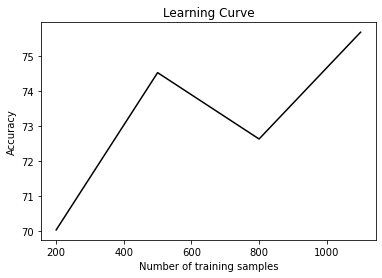

In [105]:
# extract learning curve report

from sklearn.model_selection import learning_curve
classifier = RandomForestClassifier(random_state=7)
parameter_grid = np.array([200,500,800,1100])
train_sizes,train_scores,validation_scores = learning_curve(classifier,X,Y,train_sizes=parameter_grid, cv=5)

print("\nLearning Curves")
print("\nTraining scores:\n",train_scores.astype(float))
print("\nValidation scores:\n",validation_scores)

plt.figure()
plt.plot(parameter_grid,100*np.average(validation_scores,axis=1),color='black')
plt.title("Learning Curve")
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.show()